In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = 'C:\\hudsondata\\Machine Learning\\TalkingData\\gender_age_train.csv'

In [4]:
train_data = pd.read_csv(file_path)

In [8]:
file_path = 'C:\\hudsondata\\Machine Learning\\TalkingData\\gender_age_test.csv'

In [9]:
test_data = pd.read_csv(file_path)

In [21]:
print "The train data has", len(train_data), "samples with the columns", str(train_data.columns), " with the target \
variable being group, while the test data has", len(test_data), 'samples with only the device ID'

The train data has 74645 samples with the columns Index([u'device_id', u'gender', u'age', u'group'], dtype='object')  with the target variable being group, while the test data has 112071 samples with only the device ID


In [25]:
train_data['group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [26]:
file_path = 'C:\\hudsondata\\Machine Learning\\TalkingData\\sample_submission.csv'

In [27]:
sample_submission = pd.read_csv (file_path)

In [32]:
sample_submission.iloc[0].sum()

1.0020799437289393e+18

In [34]:
sample_submission.head()

,device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,1002079943728939269,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
1,-1547860181818787117,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
2,7374582448058474277,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
3,-6220210354783429585,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
4,-5893464122623104785,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833


In [41]:
test_data['device_id'].isin(train_data['device_id']).value_counts()

False    112071
Name: device_id, dtype: int64

In [43]:
print "All of the device ID's in the train and test data are unique, so basically you are going to use the app information and model type \
to determine how the train data got to the groups and use that to do the same to the test data"

All of the device ID's in the train and test data are unique, so basically you are going to use the app information and model type to determine how the train data got to the groups and use that to do the same to the test data


In [51]:
fp_app_labels = 'C:\\hudsondata\\Machine Learning\\TalkingData\\app_labels.csv'
fp_events = 'C:\\hudsondata\\Machine Learning\\TalkingData\\events.csv'
fp_label_categories = 'C:\\hudsondata\\Machine Learning\\TalkingData\\label_categories.csv'
fp_phone_brand_device_model = 'C:\\hudsondata\\Machine Learning\\TalkingData\\phone_brand_device_model.csv'
fp_app_events = 'C:\\hudsondata\\Machine Learning\\TalkingData\\app_events.csv'

In [46]:
app_labels = pd.read_csv(fp_app_labels)
events = pd.read_csv(fp_events)
label_categories = pd.read_csv(fp_label_categories)
phone = pd.read_csv(fp_phone_brand_device_model)

In [52]:
app_events = pd.read_csv(fp_app_events)

In [68]:
phone.shape

(187245, 3)

In [69]:
events.shape

(3252950, 5)

In [70]:
app_labels.shape

(459943, 2)

In [71]:
label_categories.shape

(930, 2)

In [80]:
app_labels(app_labels['app_id'] == 6792270137491452041)

TypeError: 'DataFrame' object is not callable

In [82]:
app_labels.dtypes

app_id      int64
label_id    int64
dtype: object

In [91]:
app_labels[app_labels['app_id']==6792270137491452041]['label_id'].value_counts()

252     2
959     1
777     1
162     1
960     1
549     1
260     1
775     1
713     1
779     1
782     1
783     1
405     1
787     1
1007    1
756     1
757     1
406     1
407     1
548     1
761     1
730     1
251     1
253     1
704     1
Name: label_id, dtype: int64

In [109]:
app_labels['app_id'] = app_labels['app_id'].astype('category')
app_labels['label_id'] = app_labels['label_id'].astype('category')

In [124]:
app_labels = app_labels.drop_duplicates()

In [110]:
app_labels.shape

(459943, 3)

In [112]:
del app_labels['concat']

In [114]:
app_labels = pd.read_csv(fp_app_labels)

In [125]:
app_labels.shape

(459452, 2)

In [126]:
app_labels[app_labels['app_id']==6792270137491452041]['label_id'].value_counts()

959     1
777     1
162     1
960     1
549     1
260     1
775     1
713     1
779     1
782     1
783     1
405     1
787     1
1007    1
756     1
757     1
406     1
407     1
548     1
761     1
730     1
251     1
252     1
253     1
704     1
Name: label_id, dtype: int64

In [123]:
app_labels = pd.read_csv(fp_app_labels)

In [127]:
def drop_duplicates(dataframe):
    dataframe = dataframe.drop_duplicates()
    return dataframe

In [142]:
len(label_categories['category'].value_counts())

835

In [140]:
label_categories[label_categories['category'] == 'N']

,label_id,category


In [162]:
list(label_categories.isnull()].index)

SyntaxError: invalid syntax (<ipython-input-162-63424f388d83>, line 1)

In [155]:
label_categories = label_categories.drop(label_categories.index[[0,229,245]])

In [156]:
label_categories.shape

(927, 2)

In [171]:
def drop_Nan_rows(dataframe):
    dataframe = dataframe.dropna()
    return dataframe

In [158]:
label_categories = pd.read_csv(fp_label_categories)

In [165]:
label_categories.isnull().index

RangeIndex(start=0, stop=930, step=1)

In [168]:
label_categories = label_categories.dropna()

In [170]:
label_categories.shape

(927, 2)

In [177]:
label_categories['category'] = label_categories['category'].astype('string')

In [187]:
withdash = label_categories[label_categories['category'].str.contains('-')]

In [189]:
withdash['category'].value_counts()

4.5-3.1 inches                                                           1
High-end brand                                                           1
dotal-lol                                                                1
game-Business simulation                                                 1
High-end hotel                                                           1
game-aircraft                                                            1
game-Music and Dance                                                     1
game-3D                                                                  1
Closed-end funds                                                         1
Non-guaranteed income                                                    1
game-tank                                                                1
Third-party card management                                              1
8-core chips                                                             1
game-Fishing             

In [194]:
events['device_id'].isin(test_data['device_id']).value_counts()

True     1944822
False    1308128
Name: device_id, dtype: int64

In [193]:
len(np.unique(events['device_id']))

60865

In [197]:
len(test_data[test_data['device_id'].isin(events['device_id'])])

35194

In [198]:
print "There are 35,194 device id's in the test data out of the 112071 that are in the events table or 31.4%"

There are 35,194 device id's in the test data out of the 112071 that are in the events table


In [200]:
len(train_data[train_data['device_id'].isin(events['device_id'])])

23309

In [201]:
print "There are 23,309 device id's in the train data out of the 74,645 that are in the events or 31.22%"

There are 23,309 device id's in the train data out of the 74,645 that are in the events


In [216]:
traininevents = train_data[train_data['device_id'].isin(events['device_id'])]

In [217]:
testinevents = test_data[test_data['device_id'].isin(events['device_id'])]

In [222]:
trainineventsdev = np.asarray(traininevents['device_id'])

In [223]:
testineventsdev = np.asarray(testinevents['device_id'])

In [230]:
phone.shape

(187245, 3)

In [231]:
phone = phone.drop_duplicates()

In [239]:
phone[phone['device_id']==5245428108336915020]

,device_id,phone_brand,device_model
106025,5245428108336915020,魅族,MX4
116686,5245428108336915020,小米,MI One Plus


In [247]:
phone[phone['device_id']==-7297178577997113203]

,device_id,phone_brand,device_model
45947,-7297178577997113203,华为,荣耀畅玩5X
112903,-7297178577997113203,华为,荣耀3C


In [243]:
phone[phone['device_id']==-6590454305031525112]

,device_id,phone_brand,device_model
69302,-6590454305031525112,小米,MI 3
140520,-6590454305031525112,华为,荣耀6 Plus


In [ ]:
-7297178577997113203 -6590454305031525112 -7059081542575379359 -3004353610608679970 -5269721363279128080 

In [244]:
phone[phone['device_id']==-7059081542575379359]

,device_id,phone_brand,device_model
81222,-7059081542575379359,LG,Nexus 5
93035,-7059081542575379359,魅族,魅蓝Note 2


In [245]:
phone[phone['device_id']==-3004353610608679970]

,device_id,phone_brand,device_model
93020,-3004353610608679970,酷派,5891
128599,-3004353610608679970,酷派,7296


In [246]:
phone[phone['device_id']==-5269721363279128080 ]

,device_id,phone_brand,device_model
140501,-5269721363279128080,三星,Galaxy Core Advance
185896,-5269721363279128080,小米,MI 3


In [248]:
testinevents['device_id'].isin()

array([1002079943728939269, -1547860181818787117, 7374582448058474277, ...,
       -4419117093047158915, 2160204780761637517, 7583643168012624381], dtype=int64)

In [251]:
test_data['device_id'].isin(phone['device_id']).value_counts()

True    112071
Name: device_id, dtype: int64

In [252]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 2

In [253]:
mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [257]:
phone['phone_brand'] = phone['phone_brand'].map(mapping)

C:\Users\Jenny\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [263]:
len(phone[phone['device_model']=='荣耀畅玩5X'])

493

In [264]:
len(phone[phone['device_model']=='荣耀3C'])

2597

In [ ]:
#drop - 45947, 93020, 140501

In [266]:
len(phone[phone['device_model']=='5891'])

71

In [267]:
len(phone[phone['device_model']=='7296'])

167

In [290]:
def drop_dups_devid(phone_df):
    phone_df = phone_df.drop_duplicates(subset=['device_id'],keep='last')
    return phone_df

In [287]:
phone2 = phone.drop_duplicates(subset = ['device_id'], keep='last')

In [279]:
len(phone)

186722

In [288]:
phone2.iloc[45947]

device_id       963459008495235098
phone_brand                 Xiaomi
device_model                  MI 3
Name: 45960, dtype: object

In [291]:
apps = pd.merge(app_labels,label_categories, how = 'left', on = 'label_id')

In [299]:
apps[apps['category']=='6.0-5.6 inches'] 

,app_id,label_id,category


In [303]:
apps['general_groups'] = apps['category']
import re

In [328]:
def to_Games(x):
    if re.search('([gG]am)|([pP]oker)|([cC]hess)|([pP]uzz)|([bB]all)|([pP]ursu)|([fF]ight)|([sS]imulat)|([sH]oot)',x) is not None:
        return('Games')
    if re.search('(RPG)|(SLG)|(RAC)|(MMO)|(MOBA)', x) is not None:
        return('Games')
    if x in ['billards', 'World of Warcraft', 'Tower Defense', 'Tomb', 'Ninja', 'Europe and Fantasy', 'Senki', 
             'Shushan', 'Lottery ticket', 'majiang', 'tennis', 'Martial arts','Shootout Shooting (STG)']:
        return('Games')
    else:
        return(x)
    
def to_Property(x):
    # All property/estate stuff will be place into Property category
    if x in ['Property Industry 2.0', 'Property Industry new', 'Property Industry 1.0']:
        return('Property')
    if re.search('([eE]state)', x) is not None:
        return('Property')
    else:
        return(x)
    
def to_Family(x):
    if re.search('([fF]amili)|([mM]othe)|([fF]athe)|(bab)|([rR]elative)|([pP]regnan)|([pP]arent)|([mM]arriag)|([lL]ove)',
                 x) is not None:
        return('Family')
    else:
        return(x)
    
def to_Fun(x):
    '''One can argue about my decision however I used following rules:
       - all comics -> Fun
       - all animation/painting -> Fun
       - all things labeled as trend or passion or community -> Fun
       - all things I could identify as messangers -> Fun
       - all things related to images/pictures -> Fun
       - horoscopes -> Fun
       - jokes -> Fun
       - I don\'t know what is Parkour avoid but it goes to -> Fun''' 
    if re.search('([fF]un)|([cC]ool)|([tT]rend)|([cC]omic)|([aA]nima)|([pP]ainti)|\
                 ([fF]iction)|([pP]icture)|(joke)|([hH]oroscope)|([pP]assion)|([sS]tyle)|\
                 ([cC]ozy)|([bB]log)', x) is not None:
        return('Fun')
    if x in ['Parkour avoid class', 'community', 'Enthusiasm', 'cosplay', 'IM', 'magic']:
        return('Fun')
    else:
        return(x)
    
def to_Productivity(x):
    if x == 'Personal Effectiveness 1' or x == 'Personal Effectiveness':
        return('Productivity')
    else:
        return(x)
    
def to_Finance(x):
    if re.search('([iI]ncome)|([pP]rofitabil)|([lL]iquid)|([rR]isk)|([bB]ank)|([fF]uture)|([fF]und)|([sS]tock)|([sS]hare)',
                 x) is not None:
        return('Finance')
    if re.search('([fF]inanc)|([pP]ay)|(P2P)|([iI]nsura)|([lL]oan)|([cC]ard)|([mM]etal)|\
                  ([cC]ost)|([wW]ealth)|([bB]roker)|([bB]usiness)|([eE]xchange)', x) is not None:
        return('Finance')
    if x in ['High Flow', 'Housekeeping', 'Accounting', 'Debit and credit', 'Recipes', 'Heritage Foundation', 'IMF',]:
        return('Finance')
    else:
        return(x)

def to_Religion(x):
    if x == 'And the Church':
        return('Religion')
    else:
        return(x)

def to_Services(x):
    if re.search('([sS]ervice)', x) is not None:
        return('Services')
    else:
        return(x)

def to_Travel(x):
    if re.search('([aA]viation)|([aA]irlin)|([bB]ooki)|([tT]ravel)|\
                  ([hH]otel)|([tT]rain)|([tT]axi)|([rR]eservati)|([aA]ir)|([aA]irport)', x) is not None:
        return('Travel')
    if re.search('([jJ]ourne)|([tT]ransport)|([aA]ccommodat)|([nN]avigat)|([tT]ouris)|([fF]light)|([bB]us)', x) is not None:
        return('Travel')
    if x in ['High mobility', 'Destination Region', 'map', 'Weather', 'Rentals','Hotel Type','Hotels','Book hotel complex','Hotel application','High-end hotel','Hotel Chain']:
        return('Travel')
    else:
        return(x)

def to_Custom(x):
    if re.search('([cC]ustom)', x) is not None:
        return('Custom')
    else:
        return(x)

def to_Video(x):
    # not sure if round means Rounds app for group chat, but I stick to this hypothesis. Might be popular app in China
    if x in ['video', 'round', 'the film', 'movie']:
        return('Video')
    else:
        return(x)

def to_Shopping(x):
    if x in ['Smart Shopping', 'online malls', 'online shopping by group, like groupon', 'takeaway ordering', 
             'online shopping, price comparing', 'Buy class', 'Buy', 'shopping sharing',
             'Smart Shopping 1', 'online shopping navigation']:
        return('Shopping')
    else:
        return(x)

def to_Education(x):
    if re.search('([eE]ducati)|([rR]ead)|([sS]cienc)|([bB]ooks)', x) is not None:
        return('Education')
    if x in ['literature', 'Maternal and child population', 'psychology', 'exams', 'millitary and wars', 'news', 
             'foreign language', 'magazine and journal', 'dictionary', 'novels', 'art and culture', 'Entertainment News', 
             'College Students', 'math', 'Western Mythology', 'Technology Information', 'study abroad', 
             'Chinese Classical Mythology', 'Academic Information','Engineering Drawing']:
        return('Education')
    else:
        return(x)

def to_Vitality(x):
    if x in ['vitality', '1 vitality']:
        return('Vitality')
    if x in [ 'sports and gym', 'Health Management', 'Integrated Living', 'Medical', 'Free exercise', 'A beauty care', 
             'fashion', 'fashion outfit', 'lose weight', 'health', 'Skin care applications', 'Wearable Health']:
        return('Vitality')
    else:
        return(x)

def to_Sports(x):
    if x in ['sports', 'Sports News']:
        return('Sports')
    else:
        return(x)
    
def to_Music(x):
    if x == 'music':
        return('Music')
    else:
        return(x)

def to_Other(x):
    if x in ['1 free',
 'The elimination of class',
 'unknown',
 'free',
 'comfortable',
 'Cozy 1',
 'other',
 'Total Cost 1',
 'Classical 1',
 'Quality 1',
 'classical',
 'quality',
 'Car Owners',
 'Noble 1',
 'Pirated content',
 'Securities',
 'professional skills',
 'Jobs',
 'Reputation',
 'Simple 1',
 '1 reputation',
 'Condition of the vehicles',
 'Internet Securities',
 'weibo',
 'Housing Advice',
 'notes',
 'farm',
 'Nature 1',
 'Total Cost',
 'Sea Amoy',
 'show',
 'Car',
 'pet raising up',
 'dotal-lol',
 'Express',
 'radio',
 'Occupational identity',
 'Utilities',
 'Trust',
 'Contacts',
 'Simple',
 'Automotive News',
 'Sale of cars',
 'File Editor',
 'network disk',
 'class managemetn',
 'management',
 'natural',
 'Points Activities',
 'Decoration',
 'store management',
 'Maternal and child supplies',
 'Tour around',
 'coupon',
 'User Community',
 'Vermicelli',
 'noble',
 'poetry',
 'Antique collection',
 'Reviews',
 'Scheduling',
 'Beauty Nail',
 'shows',
 'Hardware Related',
 'Smart Home',
 'Sellers',
 'Desktop Enhancements',
 'library',
 'entertainment',
 'Calendar',
 'Ping',
 'System Tools',
 'KTV',
 'Behalf of the drive',
 'household products',
 'Information',
 'Man playing favorites',
 'App Store',
 'Appliances',
 'Peace - Search',
 'Make-up application',
 'WIFI',
 'phone',
 'Doctors',
 'Smart Appliances',
 'reality show',
 'Harem',
 'trickery',
 'Jin Yong',
 'effort',
 'Xian Xia',
 'Romance',
 'tribe',
 'email',
 'mesasge',
 'Editor',
 'Clock',
 'search',
 'Intelligent hardware',
 'Browser',
 'Furniture']:
        return('Other')
    else:
        return(x)

In [329]:
apps['general_groups'] = apps['general_groups'].apply(to_Games)
apps['general_groups'] = apps['general_groups'].apply(to_Property)
apps['general_groups'] = apps['general_groups'].apply(to_Family)
apps['general_groups'] = apps['general_groups'].apply(to_Fun)
apps['general_groups'] = apps['general_groups'].apply(to_Productivity)
apps['general_groups'] = apps['general_groups'].apply(to_Finance)
apps['general_groups'] = apps['general_groups'].apply(to_Religion)
apps['general_groups'] = apps['general_groups'].apply(to_Services)
apps['general_groups'] = apps['general_groups'].apply(to_Travel)
apps['general_groups'] = apps['general_groups'].apply(to_Custom)
apps['general_groups'] = apps['general_groups'].apply(to_Video)
apps['general_groups'] = apps['general_groups'].apply(to_Shopping)
apps['general_groups'] = apps['general_groups'].apply(to_Education)
apps['general_groups'] = apps['general_groups'].apply(to_Vitality)
apps['general_groups'] = apps['general_groups'].apply(to_Sports)
apps['general_groups'] = apps['general_groups'].apply(to_Music)
apps['general_groups'] = apps['general_groups'].apply(to_Other)

In [330]:
apps['general_groups'].value_counts()

Games           99036
Property        57921
Industry tag    56902
Custom          55416
Tencent         49320
Other           37640
Finance         27026
Fun             21860
Services        13598
Family          10865
Productivity     8498
Travel           4845
Religion         4619
Video            4455
Education        3111
Vitality         1377
Shopping         1132
Sports            931
Music             900
Name: general_groups, dtype: int64

In [331]:
apps.head()

,app_id,label_id,category,general_groups
0,7324884708820027918,251,Finance,Finance
1,-4494216993218550286,251,Finance,Finance
2,6058196446775239644,406,unknown,Other
3,6058196446775239644,407,DS_P2P net loan,Finance
4,8694625920731541625,406,unknown,Other


In [334]:
len(np.unique(phone['device_id']))

186716

In [339]:
train_device_id = np.array(train_data['device_id'])
test_device_id = np.array(test_data['device_id'])

In [346]:
all_device_id = np.hstack((train_device_id, test_device_id))

In [351]:
phone.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [360]:
pd.pivot_table(phone, index = ['phone_brand'], aggfunc = len)

,device_id,device_model
phone_brand,,
AUX,9,9
Bacardi,20,20
Bifer,59,59
CUBE,165,165
Changhong,18,18
Cong,17,17
Coolpad,8383,8383
Ctyon,5,5
Daq,9,9


In [363]:
phone['device_model'].nunique()

1599

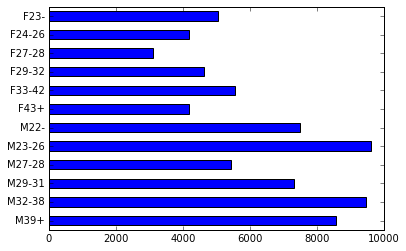

In [364]:
train_data['group'].value_counts().sort_index(ascending = False).plot(kind = 'barh')

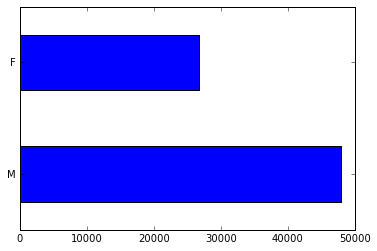

In [365]:
train_data['gender'].value_counts().sort_index(ascending = False).plot(kind = 'barh')

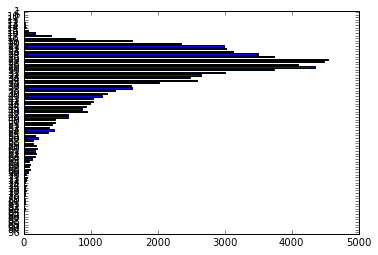

In [366]:
train_data['age'].value_counts().sort_index(ascending = False).plot(kind = 'barh')

(array([  3.81000000e+02,   1.04820000e+04,   8.51700000e+03,
          3.90200000e+03,   1.94500000e+03,   9.39000000e+02,
          4.49000000e+02,   9.40000000e+01,   2.40000000e+01,
          8.00000000e+00]),
 array([ 10. ,  18.6,  27.2,  35.8,  44.4,  53. ,  61.6,  70.2,  78.8,
         87.4,  96. ]),
 <a list of 10 Patch objects>)

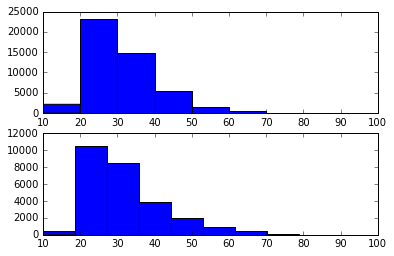

In [372]:
plt.subplot(211)
plt.hist(train_data[train_data['gender']=='M']['age'],label = 'male',bins = [10,20,30,40,50,60,70,80,90,100])
plt.subplot(212)
plt.hist(train_data[train_data['gender']=='F']['age'], label = 'female')

In [377]:
train_data.duplicated(keep ='last').sum()

0

In [379]:
train_data.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [384]:
c = train_data.groupby(['age','gender']).size().unstack().reindex(index=np.arange(train_data.age.min(), train_data.age.max()+1)).fillna(0)
ax1,ax2 = c.plot(kind = 'bar', figsize = (12,6), subplots = True)
ax1.vlines(np.array([23,26,28,32,42])-0.5,0,1800,alpha=0.5,linewidth=1,color='r')
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

gender,F,M
age,,
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,4.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


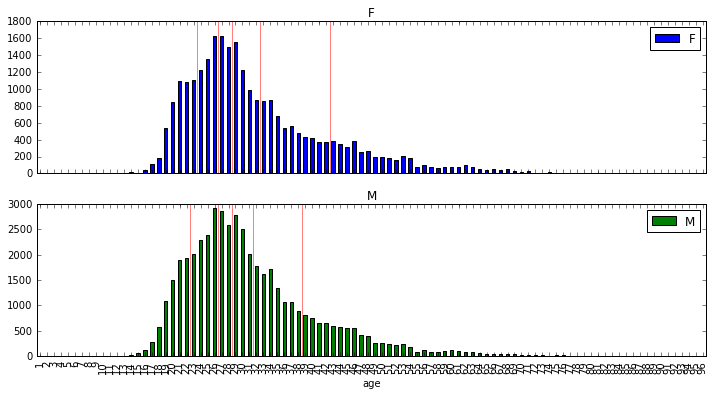

In [385]:
c = train_data.groupby(['age','gender']).size().unstack().reindex(index=np.arange(train_data.age.min(), train_data.age.max()+1)).fillna(0)
ax1,ax2 = c.plot(kind = 'bar', figsize = (12,6), subplots = True)
ax1.vlines(np.array([23,26,28,32,42])-0.5,0,1800,alpha=0.5,linewidth=1,color='r')
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

In [386]:
from sklearn.preprocessing import LabelEncoder

In [387]:
letarget = LabelEncoder().fit(train_data['group'].values)

In [389]:
train_data['legroup'] = train_data['group']

In [391]:
y = letarget.transform(train_data['legroup'].values)

In [394]:
n_classes = len(letarget.classes_)

In [395]:
n_classes

12

In [398]:
pred = np.ones((train_data.shape[0], n_classes))/n_classes

In [399]:
pred

array([[ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333],
       [ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333],
       [ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333],
       ..., 
       [ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333],
       [ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333],
       [ 0.08333333,  0.08333333,  0.08333333, ...,  0.08333333,
         0.08333333,  0.08333333]])

In [403]:
from sklearn.metrics import log_loss

In [408]:
pred = [1,0,1,0]
act = [1,0,1,0]
log_loss(pred, act)

9.9920072216264148e-16

In [412]:
log_loss(y, pred)

ValueError: Found arrays with inconsistent numbers of samples: [    4 74645]

In [409]:
y

array([10, 10, 10, ...,  6, 10,  7], dtype=int64)

In [413]:
letarget = LabelEncoder().fit(train_data.group.values)
y = letarget.transform(train_data.legroup.values)
n_classes = len(letarget.classes_)

In [416]:
pred = np.ones((train_data.shape[0],n_classes))/n_classes
log_loss(y, pred)

2.4849066497880012

In [417]:
log_loss(y, pred)

2.4849066497880012

In [419]:
# This is the benchmark log_loss

In [420]:
from sklearn.cross_validation import KFold

In [422]:
kf = KFold(train_data.shape[0], n_folds = 10, shuffle =True, random_state = 0)
pred = np.zeros((train_data.shape[0], n_classes))

In [432]:
for itrain, itest in kf:
    train = train_data.iloc[itrain,:]
    test = train_data.iloc[itest,:]
    ytrain,ytest = y[itrain], y[itest]
    prob = train.groupby('group').size()/train.shape[0]
    pred[itest,:] = prob.values
print log_loss(y,pred)
    

2.42805122275


In [427]:
train_data.groupby('group').size()/train_data.shape[0]

group
F23-      0.067654
F24-26    0.056132
F27-28    0.041771
F29-32    0.062000
F33-42    0.074499
F43+      0.056186
M22-      0.100315
M23-26    0.128676
M27-28    0.072945
M29-31    0.097917
M32-38    0.126948
M39+      0.114957
dtype: float64

In [433]:
train

,device_id,gender,age,group,legroup
0,-8076087639492063270,M,35,M32-38,M32-38
1,-2897161552818060146,M,35,M32-38,M32-38
2,-8260683887967679142,M,35,M32-38,M32-38
3,-4938849341048082022,M,30,M29-31,M29-31
4,245133531816851882,M,30,M29-31,M29-31
5,-1297074871525174196,F,24,F24-26,F24-26
6,236877999787307864,M,36,M32-38,M32-38
7,-8098239495777311881,M,38,M32-38,M32-38
8,176515041953473526,M,33,M32-38,M32-38
9,1596610250680140042,F,36,F33-42,F33-42


In [434]:
test

,device_id,gender,age,group,legroup
10,9032155484127182494,M,31,M29-31,M29-31
13,6352067998666467520,M,32,M32-38,M32-38
21,8026504930081700361,M,25,M23-26,M23-26
30,-7303294878482532208,M,33,M32-38,M32-38
43,-1539979963116391306,M,31,M29-31,M29-31
75,-6785797459639810711,M,28,M27-28,M27-28
93,-7882183570062087941,M,24,M23-26,M23-26
95,-3859751359584472885,M,30,M29-31,M29-31
100,5973319239886062800,F,28,F27-28,F27-28
102,7326636766251173655,M,27,M27-28,M27-28


In [435]:
ytrain

array([10, 10, 10, ...,  6, 10,  7], dtype=int64)

In [436]:
ytest

array([ 9, 10,  7, ...,  9,  2,  6], dtype=int64)

In [441]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)

In [450]:
phone.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [454]:
#how to know if i have the same device models with different brands

In [458]:
unique_models = np.unique(phone['device_model'])

In [ ]:
dic ={}
for element in unique_models:
    

In [468]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)
c.value_counts()

1    1525
2      38
0      28
3       7
4       1
Name: phone_brand, dtype: int64

In [469]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)
c.value_counts()

1    1525
2      38
0      28
3       7
4       1
Name: phone_brand, dtype: int64

In [470]:
phone.isnull().sum()

device_id         0
phone_brand     113
device_model      0
dtype: int64

In [471]:
phone = pd.read_csv(fp_phone_brand_device_model)

In [474]:
phone = phone.drop_duplicates()

In [479]:
len(phone)

186716

In [478]:
phone = phone.drop_duplicates(subset ='device_id',keep ='last')

In [480]:
phone.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [482]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)

In [484]:
c.value_counts()

1    1545
2      43
3       8
4       3
Name: phone_brand, dtype: int64

In [485]:
phone['ledevice_model'] = phone['device_model']

In [487]:
del phone['ledevice_model']

In [489]:
lebrand = LabelEncoder().fit(phone['phone_brand'])

In [490]:
phone['brand'] = lebrand.transform(phone['phone_brand'])

In [492]:
phone.head()

,device_id,phone_brand,device_model,brand
0,-8890648629457979026,小米,红米,51
1,1277779817574759137,小米,MI 2,51
2,5137427614288105724,三星,Galaxy S4,15
3,3669464369358936369,SUGAR,时尚手机,9
4,-5019277647504317457,三星,Galaxy Note 2,15


In [495]:
m = phone['phone_brand'].str.cat(phone['device_model'])

In [498]:
m = phone.phone_brand.str.cat(phone.device_model)
lemodel = LabelEncoder().fit(m)

In [500]:
phone['model'] =lemodel.transform(m)

In [501]:
phone.head()

,device_id,phone_brand,device_model,brand,model
0,-8890648629457979026,小米,红米,51,858
1,1277779817574759137,小米,MI 2,51,843
2,5137427614288105724,三星,Galaxy S4,15,371
3,3669464369358936369,SUGAR,时尚手机,9,166
4,-5019277647504317457,三星,Galaxy Note 2,15,347


In [505]:
c = phone['brand'].value_counts()

In [519]:
s = c.cumsum()/c.sum()

In [521]:
g= c.cumsum()

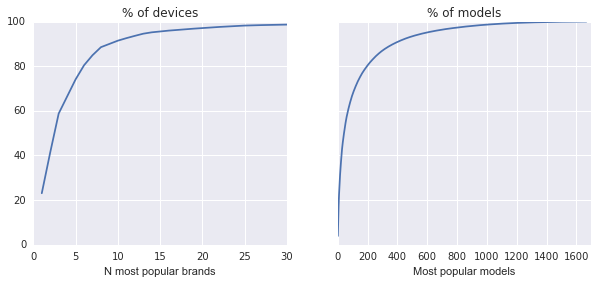

In [545]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.plot(np.arange(s.shape[0])+1, s.values*100)
ax1.set_xlim(0,30)
ax1.set_xlabel('N most popular brands')
ax1.set_title('% of devices');
ax2.plot(np.arange(e.shape[0])+1, e.values*100)
ax2.set_xlim(0, 1700)
ax2.set_xlabel('Most popular models')
ax2.set_title('% of models');

In [525]:
d = phone['model'].value_counts()

In [528]:
e = d.cumsum()/d.sum()

In [529]:
e.values

array([ 0.03932711,  0.0698494 ,  0.09824011, ...,  0.99998929,
        0.99999464,  1.        ])

In [532]:
e.shape[0]

1667L

In [536]:
np.arange(e.shape[0]+1,e.values*100)

TypeError: only length-1 arrays can be converted to Python scalars

In [541]:
np.arange(e.shape[0])+1, e.values*100

(array([   1,    2,    3, ..., 1665, 1666, 1667], dtype=int64),
 array([   3.93271064,    6.98493969,    9.8240108 , ...,   99.99892885,
          99.99946443,  100.        ]))

In [544]:
import seaborn as sns

In [546]:
phone.head()

,device_id,phone_brand,device_model,brand,model
0,-8890648629457979026,小米,红米,51,858
1,1277779817574759137,小米,MI 2,51,843
2,5137427614288105724,三星,Galaxy S4,15,371
3,3669464369358936369,SUGAR,时尚手机,9,166
4,-5019277647504317457,三星,Galaxy Note 2,15,347


In [552]:
phone['brand'].value_counts().cumsum()/phone.shape[0]

51     0.230875
15     0.413987
31     0.587866
13     0.664678
7      0.740938
128    0.804221
117    0.849113
101    0.885275
120    0.900073
2      0.914399
18     0.925604
21     0.935865
96     0.945602
30     0.951718
3      0.955788
19     0.959366
10     0.962488
69     0.965402
121    0.968262
25     0.970897
82     0.973516
14     0.975856
108    0.977972
45     0.979986
44     0.981999
62     0.983221
115    0.984104
12     0.984918
116    0.985732
99     0.986536
         ...   
26     0.999668
61     0.999695
59     0.999716
68     0.999738
35     0.999759
48     0.999780
43     0.999802
42     0.999818
129    0.999834
20     0.999850
58     0.999861
33     0.999871
113    0.999882
6      0.999893
29     0.999904
126    0.999914
17     0.999925
60     0.999936
11     0.999941
70     0.999946
53     0.999952
47     0.999957
74     0.999963
56     0.999968
86     0.999973
90     0.999979
107    0.999984
37     0.999989
23     0.999995
0      1.000000
Name: brand, dtype: floa

In [557]:
topbrands =list(phone['brand'].value_counts()[0:10].index)

In [620]:
topbrands2 =list(phone['phone_brand'].value_counts()[0:10].index)

In [560]:
train_merge = pd.merge(train_data,phone, how = 'left', on = 'device_id')

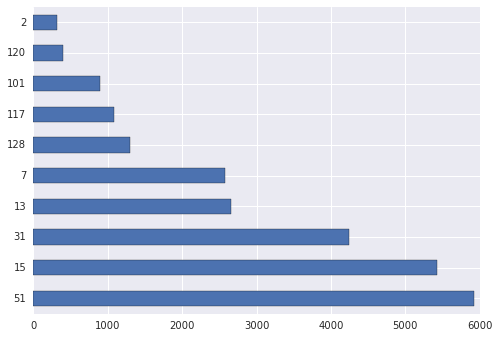

In [569]:
train_merge[train_merge['gender']=='F']['brand'].value_counts()[0:10].plot(kind = 'barh')

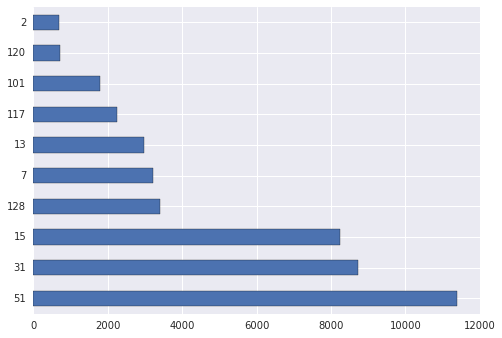

In [581]:
train_merge[train_merge['gender']=='M']['brand'].value_counts()[0:10].plot(kind = 'barh')

In [571]:
print 'The top 9 brands are the same for males and females but the order is not the same'

The top 9 brands are the same for males and females but the order is not the same


In [575]:
female = train_merge[train_merge['gender']=='F']['brand'].value_counts()[0:10]

In [594]:
female_df = pd.DataFrame(female)

In [596]:
male = train_merge[train_merge['gender']=='M']['brand'].value_counts()[0:10]

In [609]:
male_df = pd.DataFrame(male).reset_index()

In [601]:
pd.merge(female_df, male_df, how='left')

,brand
0,5918
1,5431
2,4244
3,2651
4,2571
5,1302
6,1079
7,893
8,402
9,320


In [610]:
male_df.columns = ['brand', 'male']

In [605]:
female_df = female_df.reset_index()

In [606]:
female_df.columns = ['brand', 'female']

In [608]:
female_df

,brand,female
0,51,5918
1,15,5431
2,31,4244
3,13,2651
4,7,2571
5,128,1302
6,117,1079
7,101,893
8,120,402
9,2,320


In [612]:
genderbrand = pd.merge(female_df, male_df, how= 'left', on = 'brand')

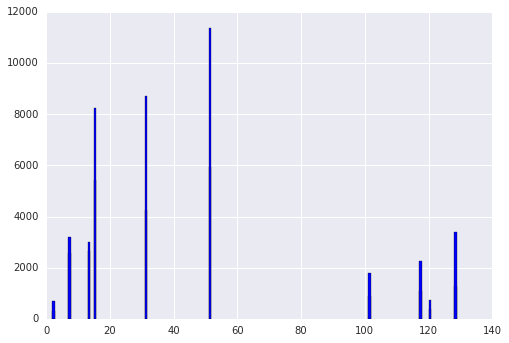

In [626]:

rects1 = plt.bar(topbrands, genderbrand['female'],color = 'red')
rects2 = plt.bar(topbrands, genderbrand['male'],color = 'blue')

In [617]:
topbrands

[51, 15, 31, 13, 7, 128, 117, 101, 120, 2]

In [627]:
#setting the position and width for the bars
pos = list(range(len(genderbrand)))
width = 0.25

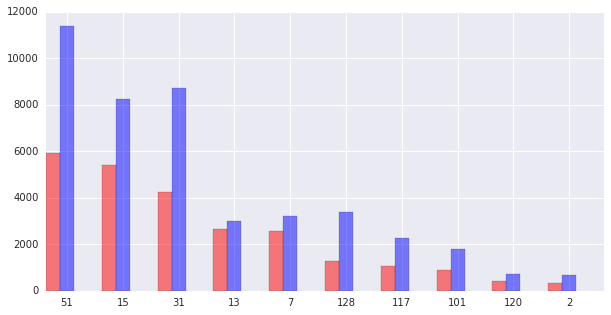

In [631]:
#plotting the bars 
fig,ax = plt.subplots(figsize = (10,5))
plt.bar(pos, genderbrand['female'], width, alpha =0.5, color = 'red')
plt.bar([p + width for p in pos], genderbrand['male'], width, alpha = 0.5, color = 'blue')
ax.set_xticklabels(genderbrand['brand'])
ax.set_xticks([p + 1.5 * width for p in pos])

In this graph, the light purple is the male which is behind the dark purple which is hte female


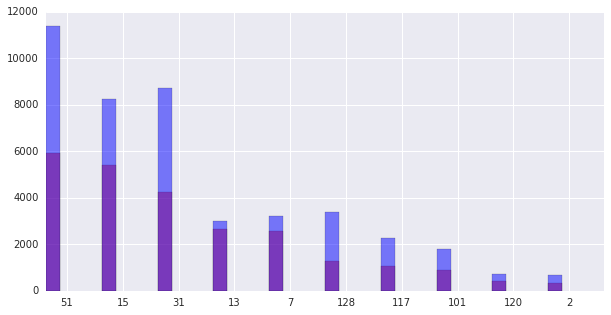

In [634]:
#plotting the bars 
fig,ax = plt.subplots(figsize = (10,5))
plt.bar(pos, genderbrand['female'], width, alpha =0.5, color = 'red')
plt.bar(pos, genderbrand['male'], width, alpha = 0.5, color = 'blue')
ax.set_xticklabels(genderbrand['brand'])
ax.set_xticks([p + 1.5 * width for p in pos])
print 'In this graph, the light purple is the male which is behind the dark purple which is hte female'

In [726]:
genderbrand.head()

,brand,female,male,femalepct,malepct,fpctphone,mpctphone
0,51,5918,11382,22.130810,23.760020,0.342081,0.657919
1,15,5431,8238,20.309637,17.196894,0.397322,0.602678
2,31,4244,8716,15.870760,18.194723,0.327469,0.672531
3,13,2651,2986,9.913616,6.233300,0.470286,0.529714
4,7,2571,3212,9.614450,6.705077,0.444579,0.555421


In [638]:
(train_merge['gender'].value_counts()/len(train_merge))*100

M    64.175765
F    35.824235
Name: gender, dtype: float64

In [655]:
genderbrand['femalepct'] = (genderbrand['female']/26741)*100
genderbrand['malepct'] = (genderbrand['male']/47904)*100

In [640]:
train_merge['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [656]:
genderbrand

,brand,female,male,femalepct,malepct
0,51,5918,11382,22.130810,23.760020
1,15,5431,8238,20.309637,17.196894
2,31,4244,8716,15.870760,18.194723
3,13,2651,2986,9.913616,6.233300
4,7,2571,3212,9.614450,6.705077
5,128,1302,3396,4.868928,7.089178
6,117,1079,2260,4.035002,4.717769
7,101,893,1798,3.339441,3.753340
8,120,402,721,1.503310,1.505094
9,2,320,693,1.196664,1.446643


In [645]:
def femalepct(lin):
    lin = (lin/26741)*100
    return lin

In [650]:
genderbrand['female'].dtype

dtype('int64')

In [657]:
genderbrand['femalepct'].sum()

92.78261845106765

In [658]:
genderbrand['malepct'].sum()

90.60203740814964

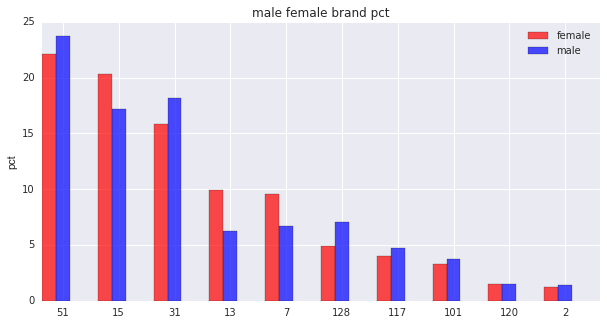

In [674]:
fig,ax = plt.subplots(figsize = (10,5))
plt.bar(pos, genderbrand['femalepct'], width, alpha =0.7, color = 'red', label = 'female')
plt.bar([p + width for p in pos], genderbrand['malepct'], width, alpha = 0.7, color = 'blue', label ='male')
ax.set_xticklabels(genderbrand['brand'])
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_ylabel('pct')
ax.set_title('male female brand pct')
plt.legend(['female', 'male'], loc='upper right')

In [667]:
print 'in this graph you can see that there are some brands that have a higher overall pct in the female segment than from the male segment like 15, 13, 7'

in this graph you can see that there are some brands that have a higher overall pct in the female segment than from the male segment like 15, 13, 7


In [672]:
genderbrand['fpctphone'] = genderbrand['female']/(genderbrand['female']+genderbrand['male'])
genderbrand['mpctphone'] = genderbrand['male']/(genderbrand['female']+genderbrand['male'])

In [673]:
genderbrand

,brand,female,male,femalepct,malepct,fpctphone,mpctphone
0,51,5918,11382,22.130810,23.760020,0.342081,0.657919
1,15,5431,8238,20.309637,17.196894,0.397322,0.602678
2,31,4244,8716,15.870760,18.194723,0.327469,0.672531
3,13,2651,2986,9.913616,6.233300,0.470286,0.529714
4,7,2571,3212,9.614450,6.705077,0.444579,0.555421
5,128,1302,3396,4.868928,7.089178,0.277139,0.722861
6,117,1079,2260,4.035002,4.717769,0.323151,0.676849
7,101,893,1798,3.339441,3.753340,0.331847,0.668153
8,120,402,721,1.503310,1.505094,0.357970,0.642030
9,2,320,693,1.196664,1.446643,0.315893,0.684107


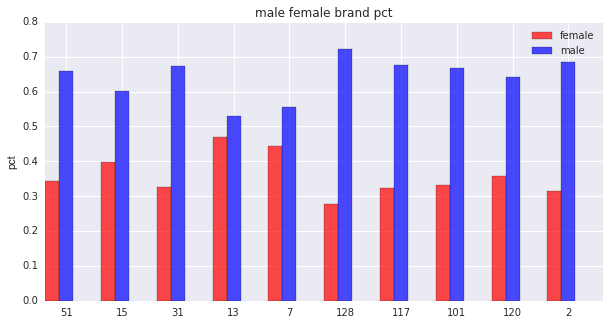

In [675]:
fig,ax = plt.subplots(figsize = (10,5))
plt.bar(pos, genderbrand['fpctphone'], width, alpha =0.7, color = 'red', label = 'female')
plt.bar([p + width for p in pos], genderbrand['mpctphone'], width, alpha = 0.7, color = 'blue', label ='male')
ax.set_xticklabels(genderbrand['brand'])
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_ylabel('pct')
ax.set_title('male female brand pct')
plt.legend(['female', 'male'], loc='upper right')

In [676]:
print 'this graph shows that in the eyes of the brand, what is their male female ratio. So if a pct is above 36% which is is the female distribution then it can be expected that there is more of a female preference for that brand'

this graph shows that in the eyes of the brand, what is their male female ratio. So if a pct is above 36% which is is the female distribution then it can be expected that there is more of a female preference for that brand


In [ ]:
#get the phone brands that have a higher 36% in the eyes of the brand market share

In [699]:
genderbrandall = pd.DataFrame(train_merge[train_merge['gender']=='F']['brand'].value_counts()).reset_index()

In [700]:
genderbrandall.columns = ['brand','female']

In [701]:
male = pd.DataFrame(train_merge[train_merge['gender']=='M']['brand'].value_counts()).reset_index()

In [703]:
male.columns = ['brand','male']

In [705]:
genderbrandall = pd.merge(male, genderbrandall, how = 'left', on = 'brand')

In [706]:
genderbrandall['pctmale'] = genderbrandall['male']/(genderbrandall['male']+genderbrandall['female'])

In [707]:
genderbrandall['pctfemale'] = genderbrandall['female']/(genderbrandall['male']+genderbrandall['female'])

In [712]:
len(genderbrandall[genderbrandall['pctfemale']>0.36])

38

In [711]:
len(genderbrandall)

114

In [714]:
genderbrandall[genderbrandall['pctfemale']>0.36].sort_values(by = 'pctfemale', ascending = False)

,brand,male,female,pctmale,pctfemale
110,9,1,5.0,0.166667,0.833333
106,124,1,3.0,0.250000,0.750000
74,5,4,11.0,0.266667,0.733333
41,99,18,39.0,0.315789,0.684211
25,69,70,143.0,0.328638,0.671362
113,127,1,2.0,0.333333,0.666667
111,104,1,2.0,0.333333,0.666667
109,105,1,2.0,0.333333,0.666667
103,76,1,2.0,0.333333,0.666667
94,67,1,2.0,0.333333,0.666667


In [715]:
genderbrandall2 = pd.merge(genderbrandall, male, how = 'left', on = 'brand')

In [717]:
genderbrandall2['pctfemale'] = genderbrandall2['female']/(genderbrandall2['male']+genderbrandall2['female'])
genderbrandall2['pctmale'] = genderbrandall2['male']/(genderbrandall2['male']+genderbrandall2['female'])

KeyError: 'male'

,brand,male_x,female,pctmale,pctfemale,male_y
0,51,11382,5918.0,0.657919,0.342081,11382
1,31,8716,4244.0,0.672531,0.327469,8716
2,15,8238,5431.0,0.602678,0.397322,8238
3,128,3396,1302.0,0.722861,0.277139,3396
4,7,3212,2571.0,0.555421,0.444579,3212
5,13,2986,2651.0,0.529714,0.470286,2986
6,117,2260,1079.0,0.676849,0.323151,2260
7,101,1798,893.0,0.668153,0.331847,1798
8,120,721,402.0,0.642030,0.357970,721
9,2,693,320.0,0.684107,0.315893,693


In [719]:
len(genderbrandall2)

114

In [721]:
len(genderbrandall2[genderbrandall2['pctfemale']>0.36].sort_values(by = 'pctfemale', ascending = False))

38

In [722]:
print 'only 38 out of hte unique phone models have % that is higher than 36 and besides 13 and 7 most of them have few units'

only 38 out of hte unique phone models have % that is higher than 36 and besides 13 and 7 most of them have few units


In [725]:
genderbrandall.fillna(0)

,brand,male,female,pctmale,pctfemale
0,51,11382,5918.0,0.657919,0.342081
1,31,8716,4244.0,0.672531,0.327469
2,15,8238,5431.0,0.602678,0.397322
3,128,3396,1302.0,0.722861,0.277139
4,7,3212,2571.0,0.555421,0.444579
5,13,2986,2651.0,0.529714,0.470286
6,117,2260,1079.0,0.676849,0.323151
7,101,1798,893.0,0.668153,0.331847
8,120,721,402.0,0.642030,0.357970
9,2,693,320.0,0.684107,0.315893
